<a href="https://colab.research.google.com/github/Phanuwat-S-S/229351-StatisticalLearning/blob/main/229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [1]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-10-31 10:31:47--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-10-31 10:31:47 (52.4 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


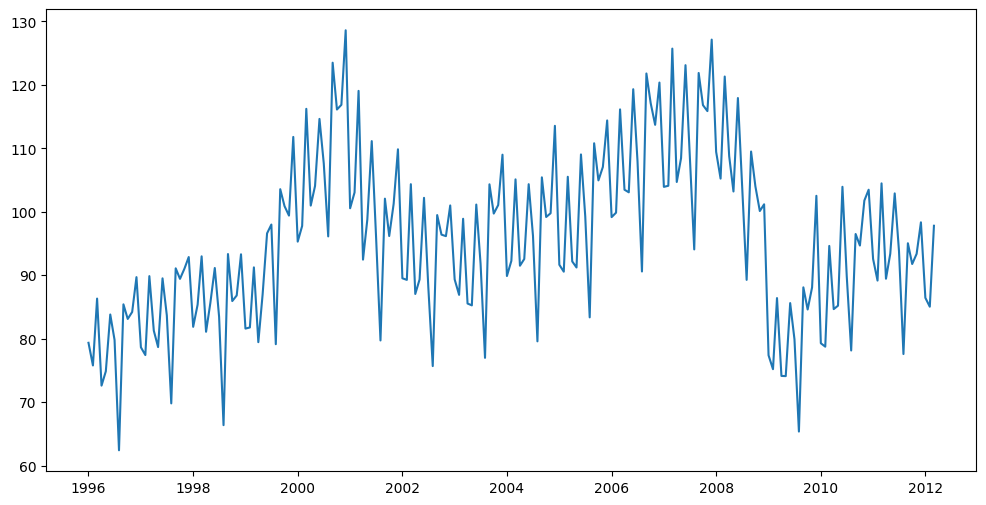

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [5]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [6]:
# Add or change values

data.loc['2012-03-02','value'] = 86

data

,Unnamed: 0,value
time,,
1996-01-01,1.0,79.35
1996-02-01,2.0,75.78
1996-03-01,3.0,86.32
1996-04-01,4.0,72.60
1996-05-01,5.0,74.86
...,...,...
2011-12-01,192.0,98.34
2012-01-01,193.0,86.44
2012-02-01,194.0,85.04


# Moving average

In [7]:
data['MA'] = data['value'].rolling(window=5,center=True).mean()
#data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1.0,79.35,NaN
1996-02-01,2.0,75.78,NaN
1996-03-01,3.0,86.32,77.782
1996-04-01,4.0,72.60,78.674
1996-05-01,5.0,74.86,79.478
1996-06-01,6.0,83.81,74.696
1996-07-01,7.0,79.80,77.258
1996-08-01,8.0,62.41,78.908
1996-09-01,9.0,85.41,78.988


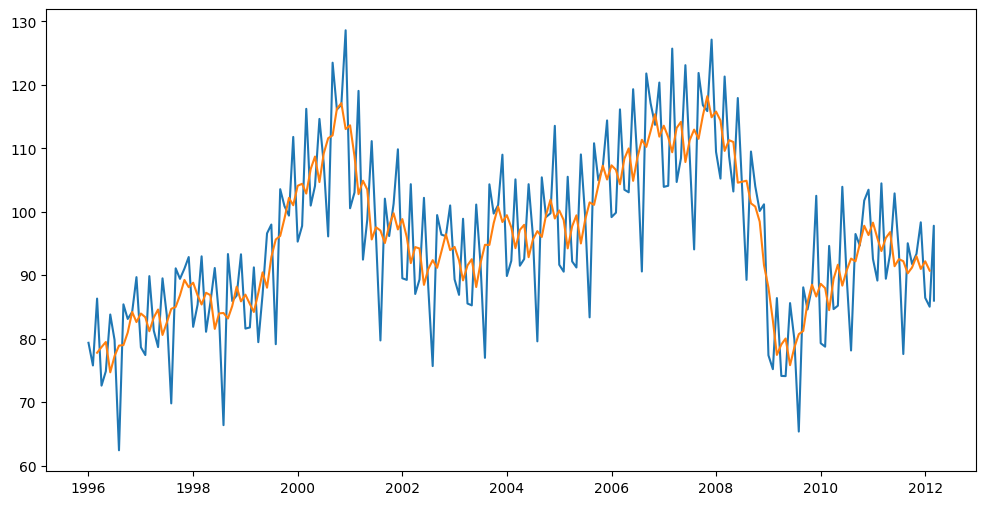

In [8]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive')

result_add.plot();

In [ ]:
result_mul = seasonal_decompose(data['value'], model='multiplicative')

result_mul.plot();

### เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

ขนาด Training set: (166, 3)
ขนาด Test set: (27, 3)

RMSE สำหรับ Test set: 14.5993


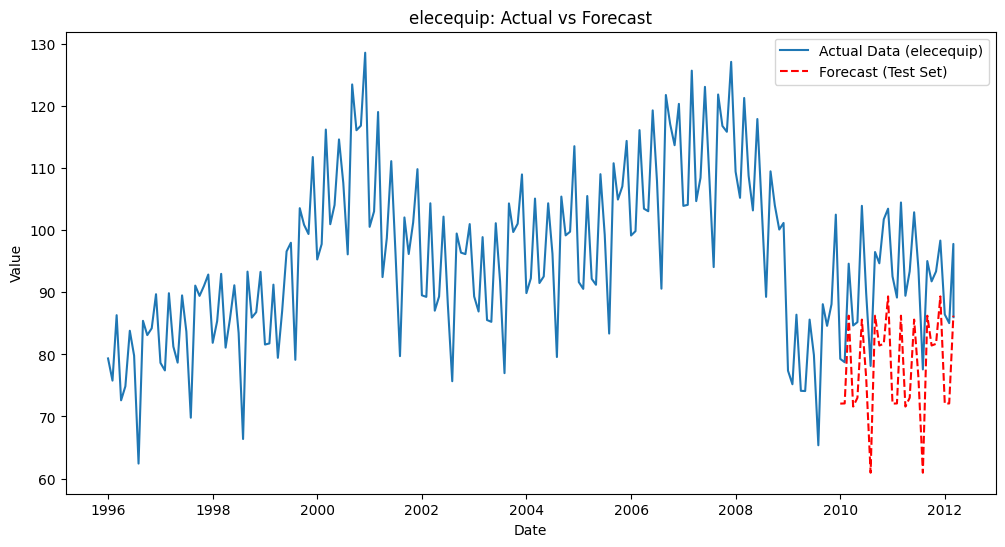

In [19]:
def rmse(y_true, y_pred):
    # Inputs
    # y_true: actual value, y_pred: predicted values
    # Output: RMSE between y_true and y_pred
    return np.sqrt(np.mean(np.square(y_true - y_pred)))

# กำหนดช่วงเวลา
train_start = '1996-01-01'
train_end = '2009-12-01'
test_start = '2010-01-01'
test_end = '2012-03-01'

# แบ่งข้อมูล Training และ Test set
train = data[train_start:train_end]
test = data[test_start:test_end]
train= train.dropna()
y_train = train['value']
y_test = test['value']
print(f"ขนาด Training set: {train.shape}")
print(f"ขนาด Test set: {test.shape}")

# --- 1.2 แยกส่วนประกอบ yt = St + Tt + Rt บน training set ---

# ทำ Time Series Decomposition (สมมติว่าเป็น Additive Model)
decomposition_train = seasonal_decompose(y_train, model='additive')
# components are available in decomposition_train.seasonal, .trend, .resid

# --- 1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set ---

# ดึงค่า Tt (Trend) และ Rt (Residual) ล่าสุดจาก Training set
# ตรวจสอบค่า NaN ที่อาจเกิดขึ้นจากการ decompose ที่ขอบข้อมูล
last_trend = decomposition_train.trend.dropna().iloc[-1]
last_resid = decomposition_train.resid.dropna().iloc[-1]
last_TR_value = last_trend + last_resid

# คำนวณค่าเฉลี่ย Seasonal (St) รายเดือนจาก Training set
monthly_seasonality_avg = decomposition_train.seasonal.groupby(
    decomposition_train.seasonal.index.month
).mean()

# สร้างค่า St สำหรับช่วง Test set โดยการ map เดือน
St_future = test.index.map(lambda x: monthly_seasonality_avg[x.month])

# คำนวณค่าทำนาย y_pred = (Tt + Rt ล่าสุด) + St_future
y_pred = last_TR_value + St_future.values # ใช้ .values เพื่อให้แน่ใจว่าเป็น numpy array สำหรับ RMSE

# --- คำนวณ RMSE โดยใช้ฟังก์ชัน rmse ---

rmse_value = rmse(test['value'].values, y_pred)
print(f"\nRMSE สำหรับ Test set: {rmse_value:.4f}")

# --- แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้ ---

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Actual Data (elecequip)')
plt.plot(test.index, y_pred, label='Forecast (Test Set)', color='red', linestyle='--')
plt.title('elecequip: Actual vs Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

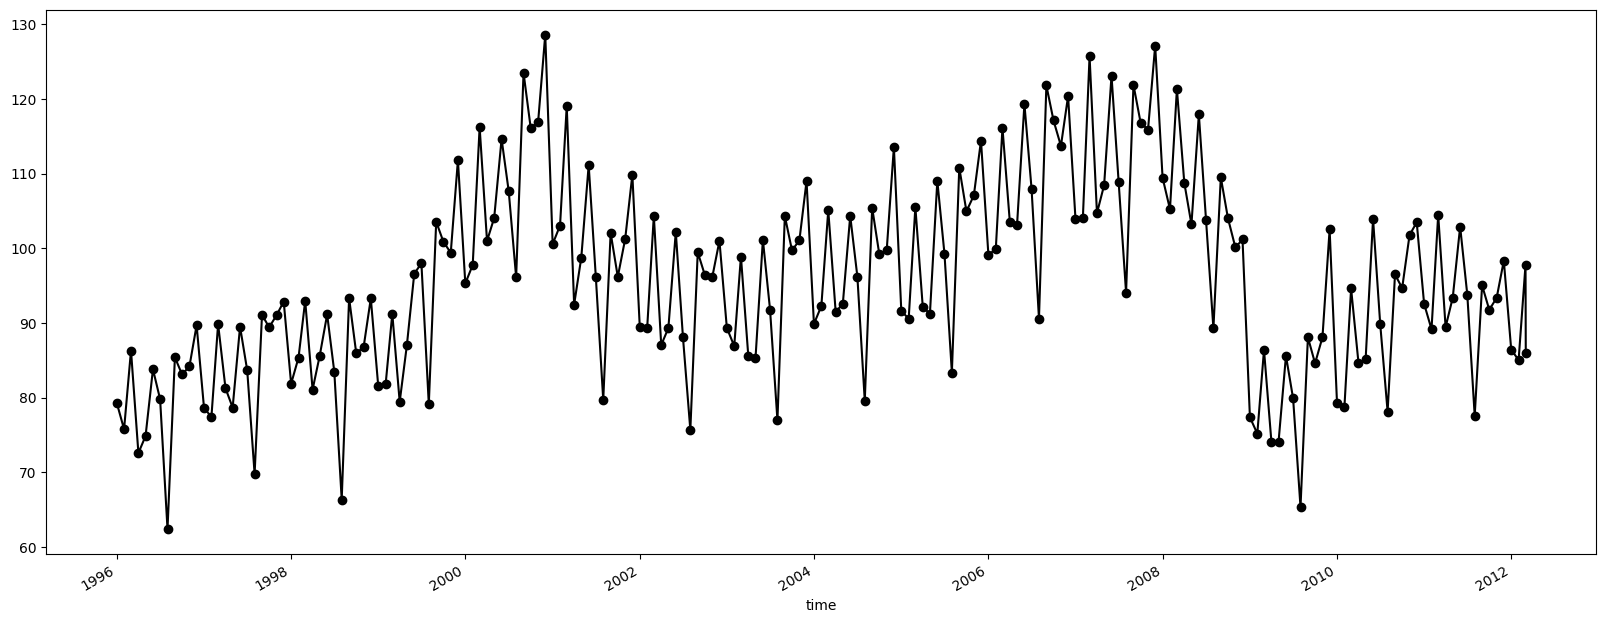

In [21]:
ax = data['value'].plot(marker='o', color='black', figsize=(20,8))